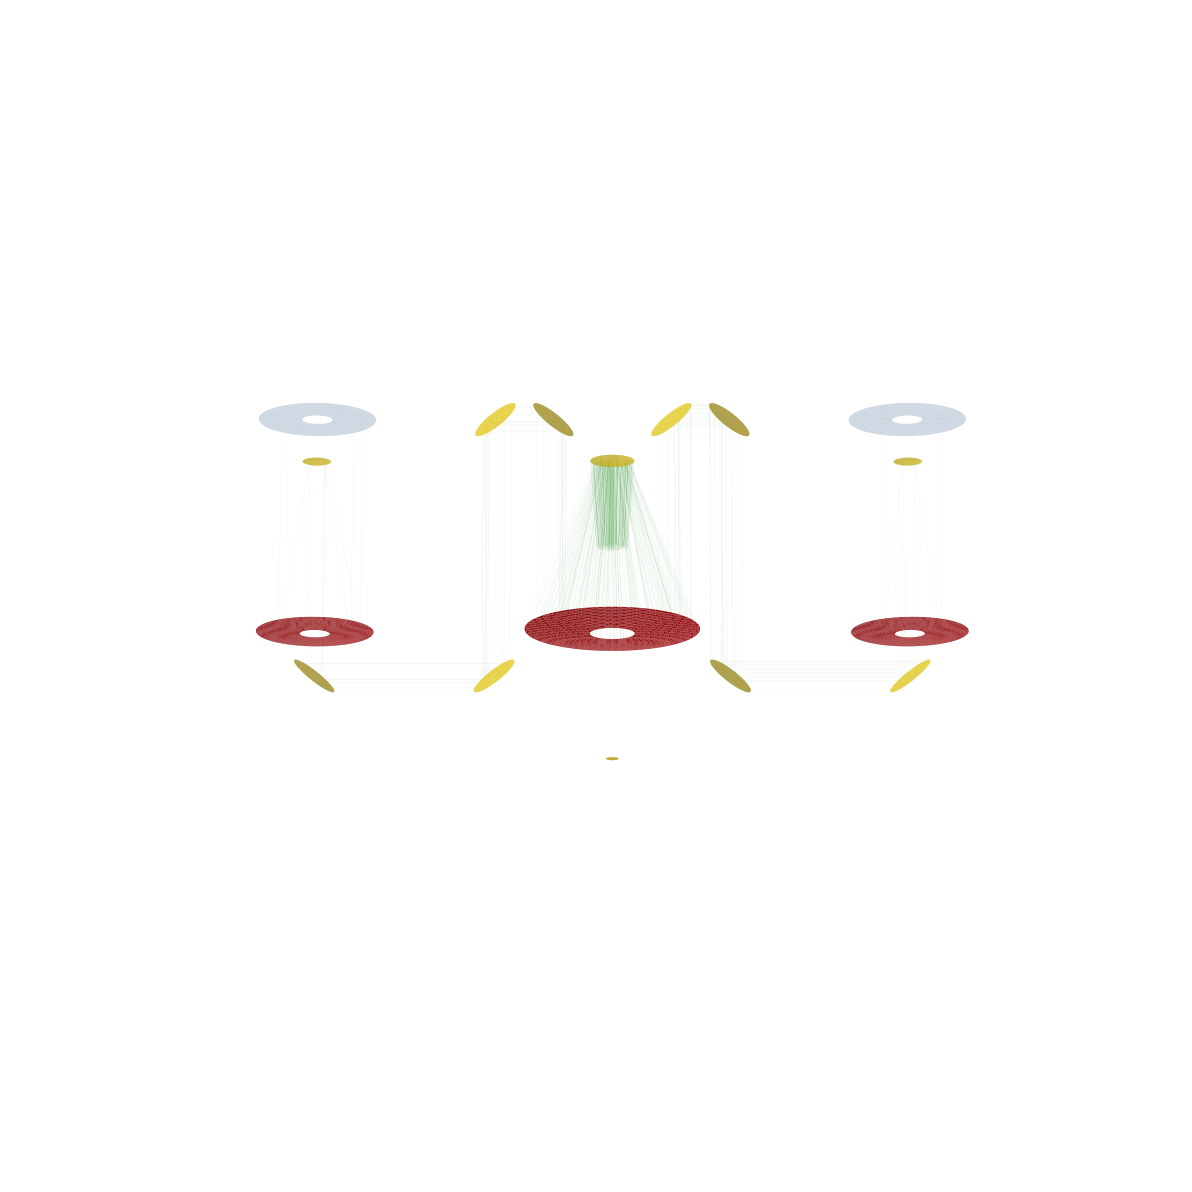

([<matplotlib.tri.triangulation.Triangulation at 0x162050490>,
 [array([0., 0., 0., ..., 0., 0., 0.]),
  array([-4.99986981, -4.99986981, -4.99986981, ..., -4.9370504 ,
         -4.9370504 , -4.9370504 ]),
  array([-0.99996136, -0.99996136, -0.99996136, ..., -0.98131745,
         -0.98131745, -0.98131745]),
  array([-5.98696489, -5.9621012 , -5.9621012 , ..., -6.35551278,
         -6.3591073 , -6.36090876]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([-4.99986981, -4.99986981, -4.99986981, ..., -4.9370504 ,
         -4.9370504 , -4.9370504 ]),
  array([-0.99996136, -0.99996136, -0.99996136, ..., -0.98131745,
         -0.98131745, -0.98131745]),
  array([-5.98696489, -5.9621012 , -5.9621012 , ..., -6.35551278,
         -6.3591073 , -6.36090876]),
  array([-5.9621012 , -5.98696489, -5.98696489, ..., -5.59355332,
         -5.5899588 , -5.58815733]),
  array([-5.98696489, -5.9621012 , -5.9621012 , ..., -6.35551278,
         -6.3591073 , -6.36090876]),
  array([-4.99970921, -4.99970921

In [217]:
import pimms.optics as op
reload(op)
sim=op.SIM(init_b=10., detector_a=.15)
opn=op.OpticalPathNetwork(sim)
s=op.LightSource((0., np.deg2rad(0.), 1e5))
s2=op.LightSource((0., np.pi, np.abs(sim.get_detectors()[0].p[2])))
p,q=s2([op.SymmetricQuadricMirror(0,1,f=np.inf,g=np.inf,p=[0.,0.,-3])], 1000, 1, sampling='random')
pt,mt=sim.trace_network(q,opn,reverse=True,starts=[sim.combiner.parts[3]],stops=sim.get_entrance())
sim.draw(draw_virtual=True,raytrace=pt,view_angles=(-15,-90))

In [218]:
print(np.unique(mt[-1]))
m=np.bool_(mt[-1]==0)
np.max(pt[-1]['direction'][m,2])

[-1  0  4]


1.0000000000000002

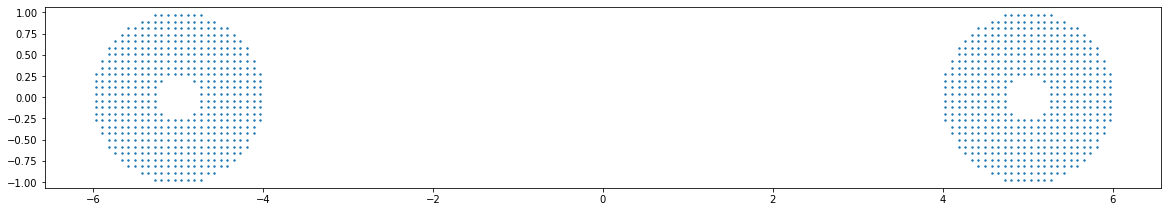

In [12]:
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
ax.scatter(p['position'][:p.size,0],p['position'][:p.size,1], s=2)
ax.set_aspect('equal')

In [64]:
import pimms.optics as op
reload(op)
sim=op.SIM()
src=op.LightSource((0.,0.,np.inf))
opn=op.OpticalPathNetwork(sim)
p,q=src(sim.get_entrance(),100,1,sampling='crosshair')
%time pt0,mt0=sim.trace(q)
%time pt1,mt1=sim.trace_network(q,opn)
print(np.all(pt0==pt1))

CPU times: user 708 ms, sys: 239 ms, total: 947 ms
Wall time: 704 ms
CPU times: user 114 ms, sys: 28.7 ms, total: 143 ms
Wall time: 117 ms
True


In [65]:
pt,mt=sim.trace_network(q,opn,starts=sim.collectors[1].get_primaries(),stops=sim.get_detectors())

In [70]:
sim.combiner.parts[2].name

'M6'